In [79]:
%matplotlib inline
import torch
import numpy as np
import d2lzh_pytorch as d2l

In [80]:
# 生成数据集
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2),
                           torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] +
          true_w[2] * poly_features[:, 2] + true_b)

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float)

In [81]:
print(features[:2])
print('\n')
print(poly_features[:2])
print('\n')
print(labels[:2])

tensor([[0.6752],
        [0.9315]])


tensor([[0.6752, 0.4559, 0.3078],
        [0.9315, 0.8676, 0.8081]])


tensor([5.9750, 7.7030])


In [82]:
def semilogy(x_vals, y_vals, x_label, y_label,
             x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [83]:
num_epochs, loss = 100, torch.nn.MSELoss()

In [84]:
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 这里参数已经被初始化了，省略了初始化步骤

    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs+1), train_ls, 'epoch', 'loss',
             range(1, num_epochs+1), test_ls, ['train', 'test'])
    print('weight', net.weight.data,
          '\nbias:', net.bias.data)



final epoch: train loss 0.00012766689178533852 test loss 0.0001600077230250463
weight tensor([[ 1.1910, -3.3944,  5.6030]]) 
bias: tensor([4.9947])


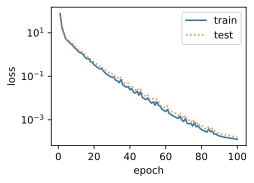

In [85]:
# 正常的三阶多项式函数拟合
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])

final epoch: train loss 267.8995056152344 test loss 101.7230453491211
weight tensor([[18.1420]]) 
bias: tensor([0.2035])


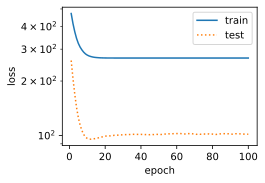

In [86]:
# 欠拟合的线性函数
fit_and_plot(features[:n_train, :], features[n_train:, :],
             labels[:n_train], labels[n_train:])
# 线性模型在非线性模型上容易欠拟合

final epoch: train loss 0.04564136639237404 test loss 210.8154754638672
weight tensor([[2.3464, 1.9414, 1.4458]]) 
bias: tensor([2.7824])


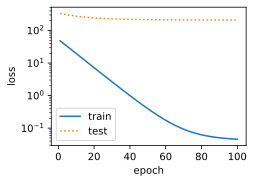

In [87]:
# 因为样本数量不足导致的过拟合
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],
             labels[0:2], labels[n_train:])